In [2]:
import numpy as np
import csv
import ast
import random
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import norm
from sklearn.metrics import mutual_info_score

# TASK 1


In [3]:
def generate_legitimate_error():

    legitimate_error_list = []
    with open('dataset/legitimate_channel_error.csv', newline='') as csvfile:
        
        for line in csvfile:
            legitimate_error_list.append(ast.literal_eval(line.strip()))

    legitimate_error_list_clean = [elem[0] if isinstance(elem, tuple) else elem for elem in legitimate_error_list]

    return legitimate_error_list_clean


def generate_eavesdropper_error():

    eavesdropper_error_list = []
    with open('dataset/eavesdropper_channel_error.csv', newline='') as csvfile:
        
        for line in csvfile:
            eavesdropper_error_list.append(ast.literal_eval(line.strip()))

    eavesdropper_error_list_clean = [elem[0] if isinstance(elem, tuple) else elem for elem in eavesdropper_error_list]

    return eavesdropper_error_list_clean

print(generate_eavesdropper_error())



[[0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 1], [1, 1, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 1], [0, 1, 1, 0, 0, 0, 0], [0, 1, 0, 1, 0, 0, 0], [0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0, 1], [0, 0, 1, 1, 0, 0, 0], [0, 0, 1, 0, 1, 0, 0], [0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0, 1], [0, 0, 0, 1, 1, 0, 0], [0, 0, 0, 1, 0, 1, 0], [0, 0, 0, 1, 0, 0, 1], [0, 0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 1, 0, 1], [0, 0, 0, 0, 0, 1, 1], [1, 1, 1, 0, 0, 0, 0], [1, 1, 0, 1, 0, 0, 0], [1, 1, 0, 0, 1, 0, 0], [1, 1, 0, 0, 0, 1, 0], [1, 1, 0, 0, 0, 0, 1], [1, 0, 1, 1, 0, 0, 0], [1, 0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 0, 1, 0], [1, 0, 1, 0, 0, 0, 1], [1, 0, 0, 1, 1, 0, 0], [1, 0, 0, 1, 0, 1, 0], [1, 0, 0, 1, 0, 0, 1], [1, 0, 0, 0, 1, 1, 0], [1, 0, 0, 0, 1, 0, 1], [1, 0, 0, 

In [4]:
def random_gen(n):
    if n <= 0:
        raise ValueError("n needs to be > 0")
    return random.randint(0, n - 1)

In [5]:
def binary_sum(x,y):

    result = []
    reminder = 0

    for i in reversed(range(len(x))):
        sum = x[i]+y[i]+reminder
        bit = sum%2
        reminder = sum // 2
        result.insert(0,bit)
    
    if reminder:
        result.insert(0,reminder)
    
    return result


In [6]:
def xor(x,y): #probabilmente si potrebbe usare numpy
    result = []
    for i in range(len(x)):
        result.append(x[i] ^ y[i])
    return result

In [7]:
def uniform_wiretap_channel(input):

    legitimate_error_list = generate_legitimate_error()
    eavesdropper_error_list = generate_eavesdropper_error()
    legitimate_error = legitimate_error_list[random_gen(8)]
    eavesdropper_error = eavesdropper_error_list[random_gen(64)]

    return (xor(input,legitimate_error),xor(input,eavesdropper_error))


x = [0,0,0,0,0,0,0]

In [8]:
def run_wiretap_simulation(input, num_runs=10**4):
    results = {}

    for _ in range(num_runs):
        y, z = uniform_wiretap_channel(input)

        # Convertiamo le liste x e y in tuple per una gestione più facile nel dizionario
        y_tuple = tuple(y)
        z_tuple = tuple(z)

        if (y_tuple, z_tuple) not in results:
            results[(y_tuple, z_tuple)] = 0
        results[(y_tuple, z_tuple)] += 1

    # Calcoliamo le probabilità
    probabilities = {key: count / num_runs for key, count in results.items()}
    
    return probabilities

# Funzione per dividere le probabilità per x e y
def divide_probabilities(probabilities):
    y_probabilities = {}
    z_probabilities = {}

    # Dividiamo le probabilità
    for (y, z), prob in probabilities.items():
        if y not in y_probabilities:
            y_probabilities[y] = 0
        if z not in z_probabilities:
            z_probabilities[z] = 0
        
        y_probabilities[y] += prob
        z_probabilities[z] += prob

    # Ordinamento delle probabilità
    y_probabilities = dict(sorted(y_probabilities.items()))
    z_probabilities = dict(sorted(z_probabilities.items()))

    return y_probabilities, z_probabilities


In [9]:
probabilities = run_wiretap_simulation([1,0,0,1,0,0,0],num_runs=10**4)
y_probabilities, z_probabilities = divide_probabilities(probabilities)

In [10]:
def plot_pmd_given_symbol_bits(z_probabilities, x=[1, 0, 0, 1, 0, 0, 0]):
    #print("Tipo di z_probabilities:", type(z_probabilities))
    #print("Esempio contenuto:", list(z_probabilities.items())[:5])

    z_values = []
    probabilities = []

    for z_tuple, prob in z_probabilities.items():
        if isinstance(z_tuple, tuple) and isinstance(prob, (int, float)):
            # Converti la tupla binaria in intero
            z_int = int(''.join(map(str, z_tuple)), 2)
            z_values.append(z_int)
            probabilities.append(prob)
        else:
            print("⚠️ Salto coppia non valida:", z_tuple, prob)

    z_values = np.array(z_values)
    probabilities = np.array(probabilities)

    # Ordina i dati per z intero
    sorted_indices = np.argsort(z_values)
    z_values = z_values[sorted_indices]
    probabilities = probabilities[sorted_indices]

    # Plot
    plt.figure(figsize=(12, 6))
    plt.bar(z_values, probabilities, color='skyblue')
    plt.xlabel("z (valore intero della sequenza binaria)")
    plt.ylabel("PMD")
    plt.title(f'PMD di $Z$ dato {x}')
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Somma delle probabilità in alto a sinistra
    plt.text(0.01, max(probabilities), f"Somma P = {np.sum(probabilities):.4f}", 
             fontsize=12, verticalalignment='top', horizontalalignment='left')

    plt.tight_layout()
    plt.show()

x = [1, 0, 0, 1, 0, 0, 0]


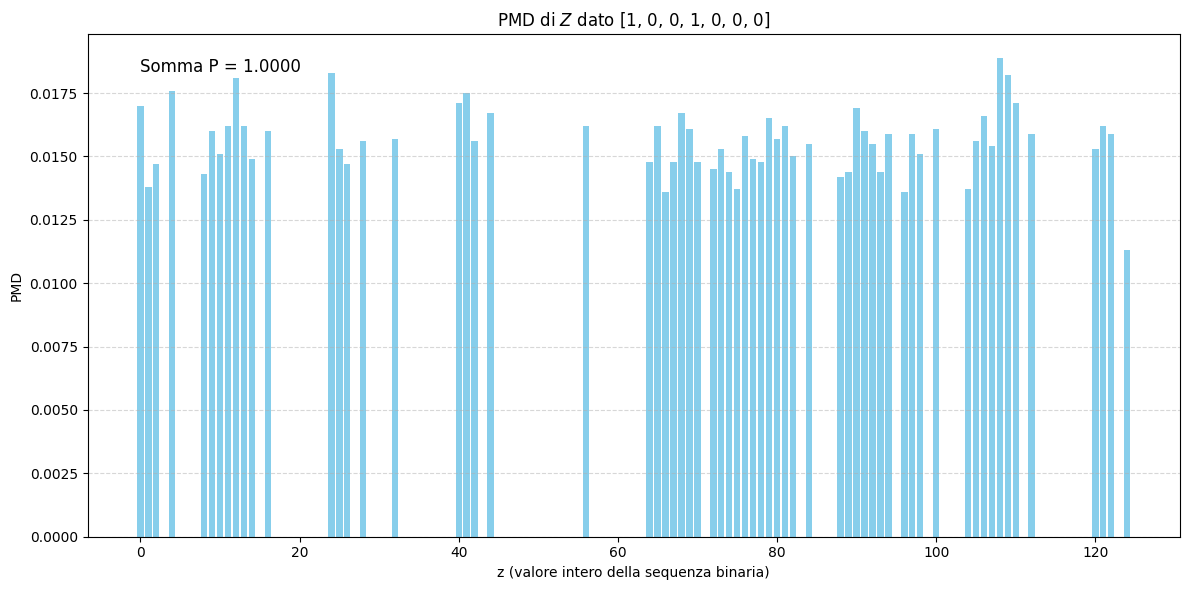

In [11]:
plot_pmd_given_symbol_bits(z_probabilities)

# Task 2

In [12]:
H_C = [[0,0,0,0,0,0,0],[0,1,0,0,1,0,1], [0,0,1,0,0,1,1], [0,0,0,1,1,1,1], [0,1,1,0,1,1,0], [0,1,0,1,0,1,0], [0,0,1,1,1,0,0], [0,1,1,1,0,0,1]]


def binary_complement(codeword):

    complement = []
    for i in range (len(codeword)):
        if(codeword[i]==1):
            complement.append(0)
        else:
            complement.append(1)
    return complement

def random_binning_encoder(u):
    mask = [1 for _ in range(7)]
    x = None

    for x in H_C:
        if x[1:4] == u:
            if random.randint(0, 1) == 1:
                x = xor(x, mask)    #calcolca il complemento
            break   
    return x

In [13]:
import itertools


all_messages = [list(vector) for vector in itertools.product([0, 1], repeat=3)]

for m in all_messages:
    print(f"Messaggio: {m}")
    x = random_binning_encoder(m)
    print(f"Codifica: {x}")

Messaggio: [0, 0, 0]
Codifica: [0, 0, 0, 0, 0, 0, 0]
Messaggio: [0, 0, 1]
Codifica: [0, 0, 0, 1, 1, 1, 1]
Messaggio: [0, 1, 0]
Codifica: [0, 0, 1, 0, 0, 1, 1]
Messaggio: [0, 1, 1]
Codifica: [1, 1, 0, 0, 0, 1, 1]
Messaggio: [1, 0, 0]
Codifica: [1, 0, 1, 1, 0, 1, 0]
Messaggio: [1, 0, 1]
Codifica: [0, 1, 0, 1, 0, 1, 0]
Messaggio: [1, 1, 0]
Codifica: [0, 1, 1, 0, 1, 1, 0]
Messaggio: [1, 1, 1]
Codifica: [1, 0, 0, 0, 1, 1, 0]


# Task 3

In [14]:
def hamming_distance(x,y):
    
    if len(x) != len(y):
        raise ValueError("Le liste devono avere la stessa lunghezza")
    return sum(el_x != el_y for el_x, el_y in zip(x, y))


def random_binning_decoder(y):
    h_c = H_C + [xor([1,1,1,1,1,1,1],x) for x in H_C]
    distances = [hamming_distance(y, x) for x in h_c]
    min_index = distances.index(min(distances))

    x = h_c[min_index]
    if x[0] == 1:
        u = xor(x[1:4], [1,1,1])
    else:
        u = x[1:4]
    return u

In [15]:
all_messages = [list(vector) for vector in itertools.product([0, 1], repeat=3)]

for m in all_messages:
    print(f"Message: {m}")
    x = random_binning_encoder(m)
    print(f"Coding: {x}")

    u = random_binning_decoder(x)
    print(f"Uncoding: {u}")
    print("-----")

Message: [0, 0, 0]
Coding: [1, 1, 1, 1, 1, 1, 1]
Uncoding: [0, 0, 0]
-----
Message: [0, 0, 1]
Coding: [1, 1, 1, 0, 0, 0, 0]
Uncoding: [0, 0, 1]
-----
Message: [0, 1, 0]
Coding: [1, 1, 0, 1, 1, 0, 0]
Uncoding: [0, 1, 0]
-----
Message: [0, 1, 1]
Coding: [1, 1, 0, 0, 0, 1, 1]
Uncoding: [0, 1, 1]
-----
Message: [1, 0, 0]
Coding: [1, 0, 1, 1, 0, 1, 0]
Uncoding: [1, 0, 0]
-----
Message: [1, 0, 1]
Coding: [1, 0, 1, 0, 1, 0, 1]
Uncoding: [1, 0, 1]
-----
Message: [1, 1, 0]
Coding: [1, 0, 0, 1, 0, 0, 1]
Uncoding: [1, 1, 0]
-----
Message: [1, 1, 1]
Coding: [1, 0, 0, 0, 1, 1, 0]
Uncoding: [1, 1, 1]
-----


In [16]:
all_messages = [list(vector) for vector in itertools.product([0, 1], repeat=3)]

for m in all_messages:
    print(f"Message: {m}")
    x = random_binning_encoder(m)
    print(f"Coding: {x}")
    y, _ = uniform_wiretap_channel(x)
    print(f"Legitimate channel: {y}")

    u = random_binning_decoder(y)
    print(f"Uncoding: {u}")
    print("-----")

Message: [0, 0, 0]
Coding: [0, 0, 0, 0, 0, 0, 0]
Legitimate channel: [0, 0, 0, 0, 0, 1, 0]
Uncoding: [0, 0, 0]
-----
Message: [0, 0, 1]
Coding: [0, 0, 0, 1, 1, 1, 1]
Legitimate channel: [0, 0, 0, 0, 1, 1, 1]
Uncoding: [0, 0, 1]
-----
Message: [0, 1, 0]
Coding: [1, 1, 0, 1, 1, 0, 0]
Legitimate channel: [0, 1, 0, 1, 1, 0, 0]
Uncoding: [0, 1, 0]
-----
Message: [0, 1, 1]
Coding: [1, 1, 0, 0, 0, 1, 1]
Legitimate channel: [1, 1, 0, 1, 0, 1, 1]
Uncoding: [0, 1, 1]
-----
Message: [1, 0, 0]
Coding: [1, 0, 1, 1, 0, 1, 0]
Legitimate channel: [1, 0, 1, 1, 0, 1, 0]
Uncoding: [1, 0, 0]
-----
Message: [1, 0, 1]
Coding: [0, 1, 0, 1, 0, 1, 0]
Legitimate channel: [1, 1, 0, 1, 0, 1, 0]
Uncoding: [1, 0, 1]
-----
Message: [1, 1, 0]
Coding: [0, 1, 1, 0, 1, 1, 0]
Legitimate channel: [0, 1, 1, 0, 1, 1, 0]
Uncoding: [1, 1, 0]
-----
Message: [1, 1, 1]
Coding: [1, 0, 0, 0, 1, 1, 0]
Legitimate channel: [1, 0, 0, 1, 1, 1, 0]
Uncoding: [1, 1, 1]
-----


#TASK 4

In [17]:
import matplotlib.pyplot as plt

def eavesdropper_channel(u):
    x = random_binning_encoder(u)
    _, z = uniform_wiretap_channel(x)
    return z


def gen_eavesdropper_data(n_sample):
    all_messages = [list(vector) for vector in itertools.product([0, 1], repeat=3)]
    dist = {}
    
    for u in all_messages:
        zetas = {}
        for _ in range(n_sample):
            z = eavesdropper_channel(u)
            if tuple(z) not in zetas:
                zetas[tuple(z)] = 0
            zetas[tuple(z)] += 1
        probabilities = {key: count / n_sample for key, count in zetas.items()}
        dist[tuple(u)] = probabilities


    return dist

In [18]:
dist = gen_eavesdropper_data(100*(2**7))
#print("Probabilità per di zeta | u:")
#for u, probabilities in dist.items():
#    print(f"u = {u} : {probabilities}\n")

In [19]:
z_dist = {}
zetas = [list(array) for array in itertools.product([0, 1], repeat=7)]

p_u = 1/8 #has to be uniform to allow z_dist sum to 1

for z in zetas:
    for u, cond_prob in dist.items():
        if tuple(z) not in z_dist:
            z_dist[tuple(z)] = 0
        z_dist[tuple(z)] += cond_prob[tuple(z)] * p_u

print("Probabilità per zeta:")
for z, joint_prob in z_dist.items():
    print(f"z = {z} : {joint_prob:.6f}")

Probabilità per zeta:
z = (0, 0, 0, 0, 0, 0, 0) : 0.008125
z = (0, 0, 0, 0, 0, 0, 1) : 0.008037
z = (0, 0, 0, 0, 0, 1, 0) : 0.008281
z = (0, 0, 0, 0, 0, 1, 1) : 0.007490
z = (0, 0, 0, 0, 1, 0, 0) : 0.007324
z = (0, 0, 0, 0, 1, 0, 1) : 0.007793
z = (0, 0, 0, 0, 1, 1, 0) : 0.007451
z = (0, 0, 0, 0, 1, 1, 1) : 0.007930
z = (0, 0, 0, 1, 0, 0, 0) : 0.007910
z = (0, 0, 0, 1, 0, 0, 1) : 0.007539
z = (0, 0, 0, 1, 0, 1, 0) : 0.007686
z = (0, 0, 0, 1, 0, 1, 1) : 0.007998
z = (0, 0, 0, 1, 1, 0, 0) : 0.007539
z = (0, 0, 0, 1, 1, 0, 1) : 0.007295
z = (0, 0, 0, 1, 1, 1, 0) : 0.007783
z = (0, 0, 0, 1, 1, 1, 1) : 0.007764
z = (0, 0, 1, 0, 0, 0, 0) : 0.007285
z = (0, 0, 1, 0, 0, 0, 1) : 0.007832
z = (0, 0, 1, 0, 0, 1, 0) : 0.007832
z = (0, 0, 1, 0, 0, 1, 1) : 0.007959
z = (0, 0, 1, 0, 1, 0, 0) : 0.007578
z = (0, 0, 1, 0, 1, 0, 1) : 0.008164
z = (0, 0, 1, 0, 1, 1, 0) : 0.007607
z = (0, 0, 1, 0, 1, 1, 1) : 0.007695
z = (0, 0, 1, 1, 0, 0, 0) : 0.007988
z = (0, 0, 1, 1, 0, 0, 1) : 0.008086
z = (0, 0, 1, 1,

In [20]:
sum_prob = 0
for z, joint_prob in z_dist.items():
    sum_prob += joint_prob
print(f"Somma delle probabilità: {sum_prob:.6f}")

Somma delle probabilità: 1.000000


In [21]:
def plot_conditional_distribution(dist, u):
    #sort to have all equal plots
    dist[u] = dict(sorted(dist[u].items(), key=lambda item: item[0]))
    print('dist:', dist)

    #split keys and values
    z_values = list(dist[u].keys())
    probabilities = list(dist[u].values())

    #print('z_values:', z_values)
    #print('probabilities:', probabilities)
    
    plt.figure(figsize=(21, 9))
    plt.bar(range(len(z_values)), probabilities, tick_label=[int(''.join(map(str, value)),2) for value in z_values])
    plt.xticks(rotation=90, ha="right")
    plt.xlabel("z (base 10)")
    plt.ylabel("P(z | u)")
    plt.title(f"Conditional Distribution of z given u = {u}")
    plt.ylim(0.000, 0.012) #fix y axis to have always the same scale
    plt.show()

dist: {(0, 0, 0): {(0, 0, 0, 0, 0, 0, 0): 0.008203125, (0, 0, 0, 0, 0, 0, 1): 0.008515625, (0, 0, 0, 0, 0, 1, 0): 0.006796875, (0, 0, 0, 0, 0, 1, 1): 0.00765625, (0, 0, 0, 0, 1, 0, 0): 0.007265625, (0, 0, 0, 0, 1, 0, 1): 0.007890625, (0, 0, 0, 0, 1, 1, 0): 0.008203125, (0, 0, 0, 0, 1, 1, 1): 0.0075, (0, 0, 0, 1, 0, 0, 0): 0.00828125, (0, 0, 0, 1, 0, 0, 1): 0.007890625, (0, 0, 0, 1, 0, 1, 0): 0.00875, (0, 0, 0, 1, 0, 1, 1): 0.008046875, (0, 0, 0, 1, 1, 0, 0): 0.008125, (0, 0, 0, 1, 1, 0, 1): 0.00734375, (0, 0, 0, 1, 1, 1, 0): 0.0090625, (0, 0, 0, 1, 1, 1, 1): 0.007265625, (0, 0, 1, 0, 0, 0, 0): 0.008359375, (0, 0, 1, 0, 0, 0, 1): 0.00890625, (0, 0, 1, 0, 0, 1, 0): 0.007890625, (0, 0, 1, 0, 0, 1, 1): 0.0078125, (0, 0, 1, 0, 1, 0, 0): 0.00703125, (0, 0, 1, 0, 1, 0, 1): 0.009296875, (0, 0, 1, 0, 1, 1, 0): 0.007265625, (0, 0, 1, 0, 1, 1, 1): 0.00875, (0, 0, 1, 1, 0, 0, 0): 0.00859375, (0, 0, 1, 1, 0, 0, 1): 0.00921875, (0, 0, 1, 1, 0, 1, 0): 0.007734375, (0, 0, 1, 1, 0, 1, 1): 0.008671875, 

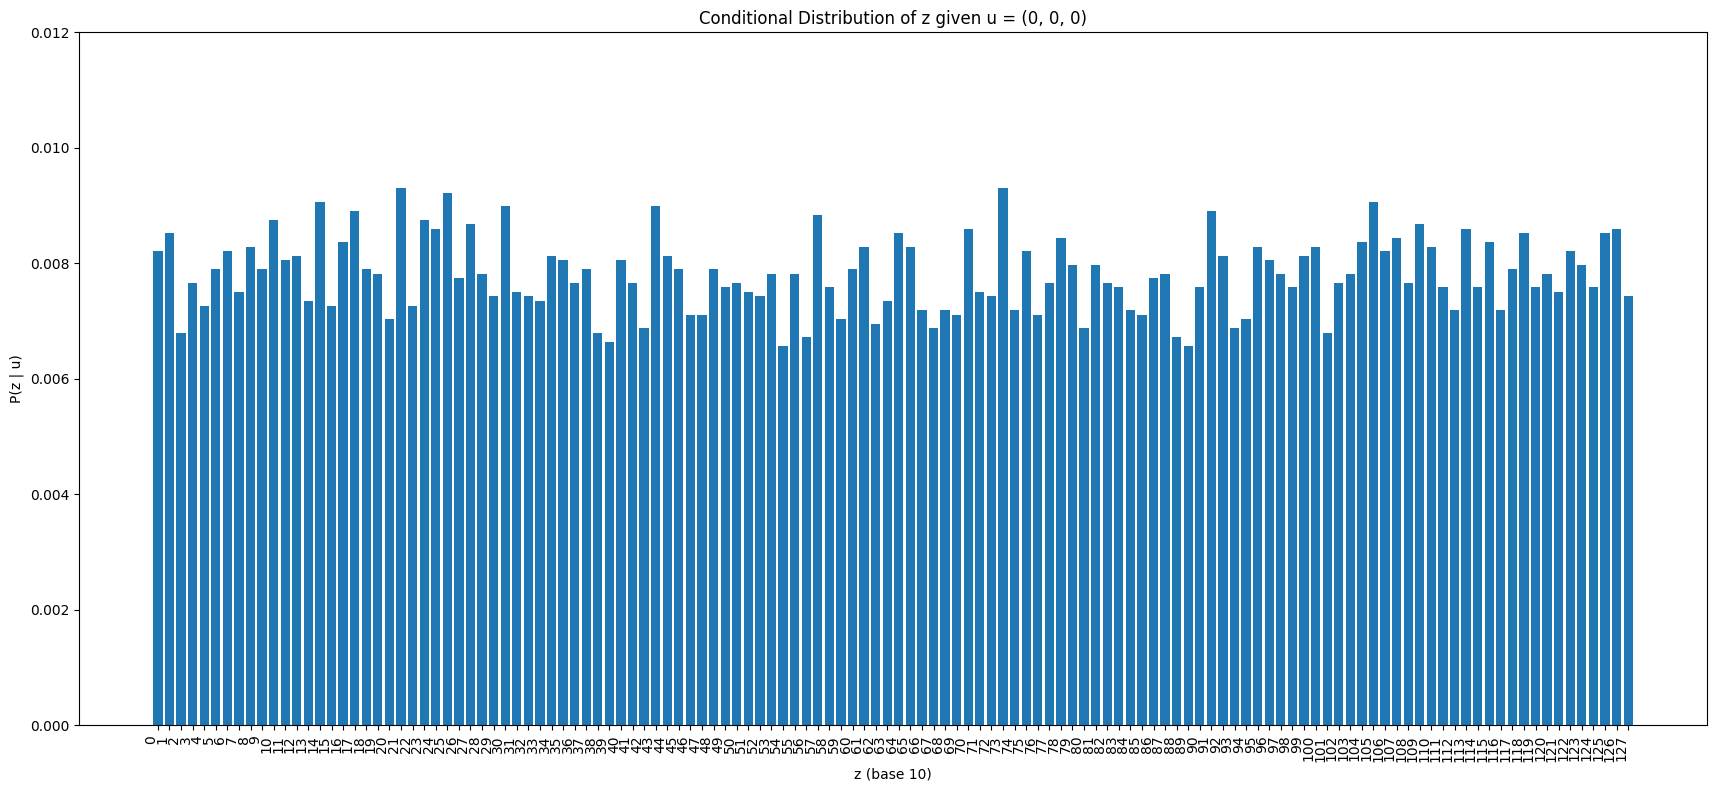

dist: {(0, 0, 0): {(0, 0, 0, 0, 0, 0, 0): 0.008203125, (0, 0, 0, 0, 0, 0, 1): 0.008515625, (0, 0, 0, 0, 0, 1, 0): 0.006796875, (0, 0, 0, 0, 0, 1, 1): 0.00765625, (0, 0, 0, 0, 1, 0, 0): 0.007265625, (0, 0, 0, 0, 1, 0, 1): 0.007890625, (0, 0, 0, 0, 1, 1, 0): 0.008203125, (0, 0, 0, 0, 1, 1, 1): 0.0075, (0, 0, 0, 1, 0, 0, 0): 0.00828125, (0, 0, 0, 1, 0, 0, 1): 0.007890625, (0, 0, 0, 1, 0, 1, 0): 0.00875, (0, 0, 0, 1, 0, 1, 1): 0.008046875, (0, 0, 0, 1, 1, 0, 0): 0.008125, (0, 0, 0, 1, 1, 0, 1): 0.00734375, (0, 0, 0, 1, 1, 1, 0): 0.0090625, (0, 0, 0, 1, 1, 1, 1): 0.007265625, (0, 0, 1, 0, 0, 0, 0): 0.008359375, (0, 0, 1, 0, 0, 0, 1): 0.00890625, (0, 0, 1, 0, 0, 1, 0): 0.007890625, (0, 0, 1, 0, 0, 1, 1): 0.0078125, (0, 0, 1, 0, 1, 0, 0): 0.00703125, (0, 0, 1, 0, 1, 0, 1): 0.009296875, (0, 0, 1, 0, 1, 1, 0): 0.007265625, (0, 0, 1, 0, 1, 1, 1): 0.00875, (0, 0, 1, 1, 0, 0, 0): 0.00859375, (0, 0, 1, 1, 0, 0, 1): 0.00921875, (0, 0, 1, 1, 0, 1, 0): 0.007734375, (0, 0, 1, 1, 0, 1, 1): 0.008671875, 

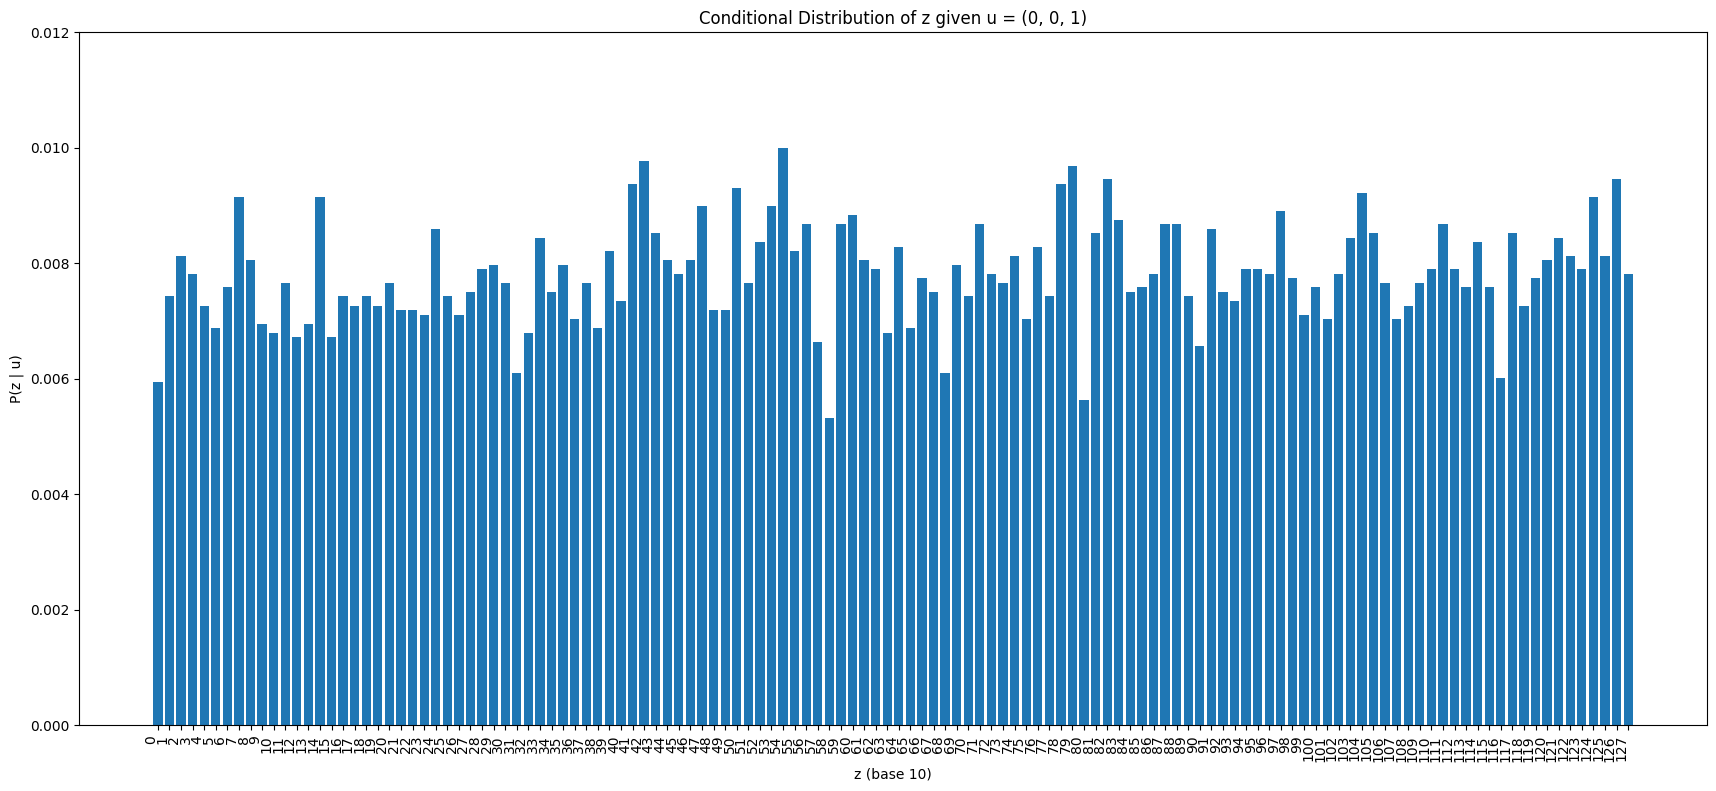

dist: {(0, 0, 0): {(0, 0, 0, 0, 0, 0, 0): 0.008203125, (0, 0, 0, 0, 0, 0, 1): 0.008515625, (0, 0, 0, 0, 0, 1, 0): 0.006796875, (0, 0, 0, 0, 0, 1, 1): 0.00765625, (0, 0, 0, 0, 1, 0, 0): 0.007265625, (0, 0, 0, 0, 1, 0, 1): 0.007890625, (0, 0, 0, 0, 1, 1, 0): 0.008203125, (0, 0, 0, 0, 1, 1, 1): 0.0075, (0, 0, 0, 1, 0, 0, 0): 0.00828125, (0, 0, 0, 1, 0, 0, 1): 0.007890625, (0, 0, 0, 1, 0, 1, 0): 0.00875, (0, 0, 0, 1, 0, 1, 1): 0.008046875, (0, 0, 0, 1, 1, 0, 0): 0.008125, (0, 0, 0, 1, 1, 0, 1): 0.00734375, (0, 0, 0, 1, 1, 1, 0): 0.0090625, (0, 0, 0, 1, 1, 1, 1): 0.007265625, (0, 0, 1, 0, 0, 0, 0): 0.008359375, (0, 0, 1, 0, 0, 0, 1): 0.00890625, (0, 0, 1, 0, 0, 1, 0): 0.007890625, (0, 0, 1, 0, 0, 1, 1): 0.0078125, (0, 0, 1, 0, 1, 0, 0): 0.00703125, (0, 0, 1, 0, 1, 0, 1): 0.009296875, (0, 0, 1, 0, 1, 1, 0): 0.007265625, (0, 0, 1, 0, 1, 1, 1): 0.00875, (0, 0, 1, 1, 0, 0, 0): 0.00859375, (0, 0, 1, 1, 0, 0, 1): 0.00921875, (0, 0, 1, 1, 0, 1, 0): 0.007734375, (0, 0, 1, 1, 0, 1, 1): 0.008671875, 

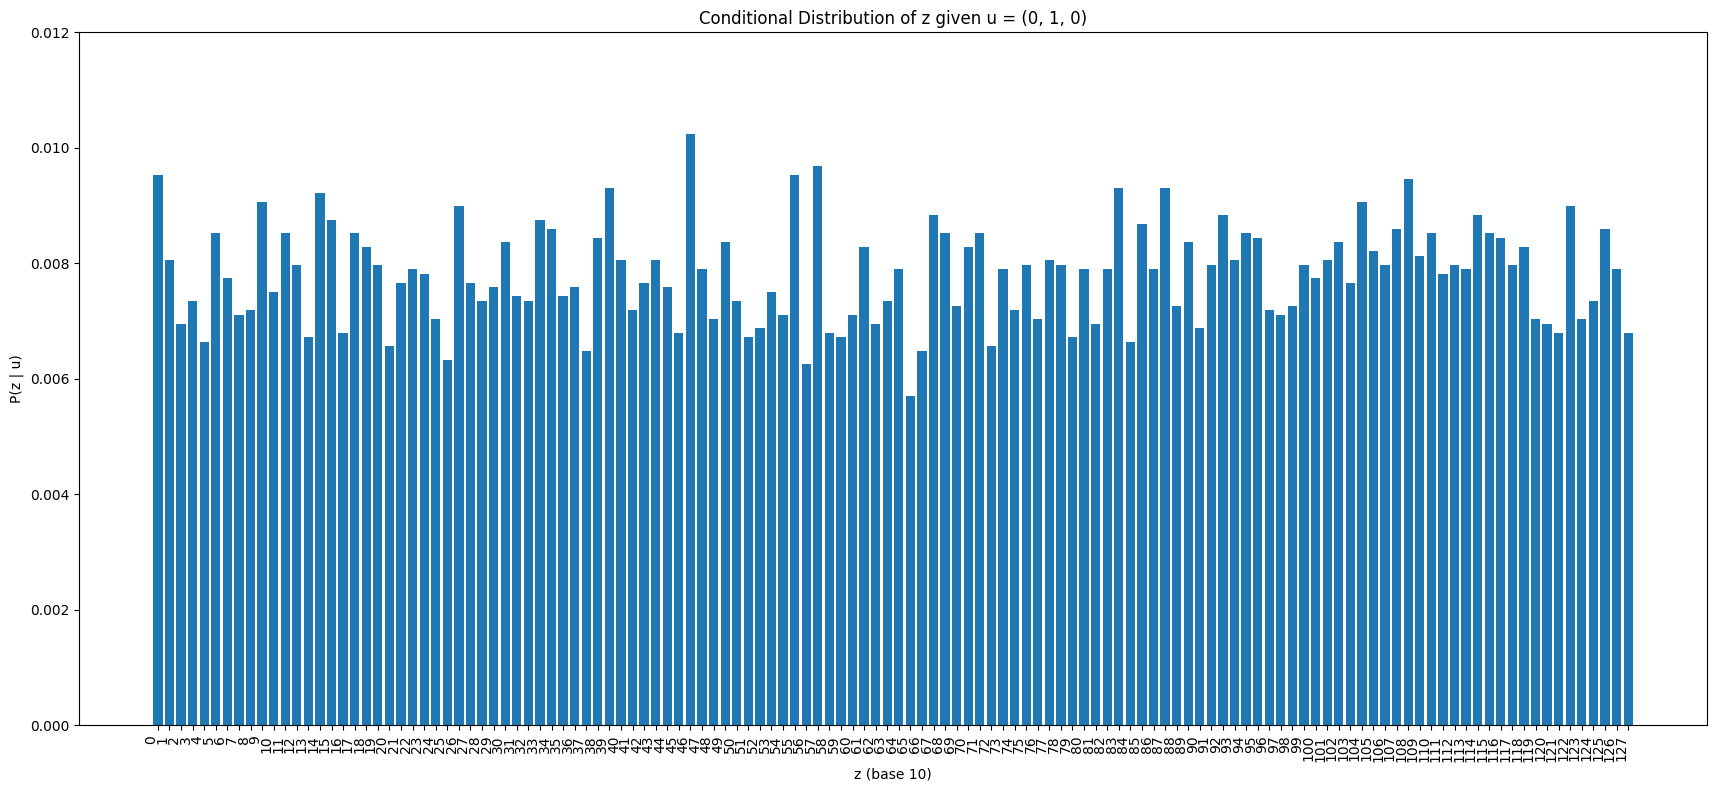

dist: {(0, 0, 0): {(0, 0, 0, 0, 0, 0, 0): 0.008203125, (0, 0, 0, 0, 0, 0, 1): 0.008515625, (0, 0, 0, 0, 0, 1, 0): 0.006796875, (0, 0, 0, 0, 0, 1, 1): 0.00765625, (0, 0, 0, 0, 1, 0, 0): 0.007265625, (0, 0, 0, 0, 1, 0, 1): 0.007890625, (0, 0, 0, 0, 1, 1, 0): 0.008203125, (0, 0, 0, 0, 1, 1, 1): 0.0075, (0, 0, 0, 1, 0, 0, 0): 0.00828125, (0, 0, 0, 1, 0, 0, 1): 0.007890625, (0, 0, 0, 1, 0, 1, 0): 0.00875, (0, 0, 0, 1, 0, 1, 1): 0.008046875, (0, 0, 0, 1, 1, 0, 0): 0.008125, (0, 0, 0, 1, 1, 0, 1): 0.00734375, (0, 0, 0, 1, 1, 1, 0): 0.0090625, (0, 0, 0, 1, 1, 1, 1): 0.007265625, (0, 0, 1, 0, 0, 0, 0): 0.008359375, (0, 0, 1, 0, 0, 0, 1): 0.00890625, (0, 0, 1, 0, 0, 1, 0): 0.007890625, (0, 0, 1, 0, 0, 1, 1): 0.0078125, (0, 0, 1, 0, 1, 0, 0): 0.00703125, (0, 0, 1, 0, 1, 0, 1): 0.009296875, (0, 0, 1, 0, 1, 1, 0): 0.007265625, (0, 0, 1, 0, 1, 1, 1): 0.00875, (0, 0, 1, 1, 0, 0, 0): 0.00859375, (0, 0, 1, 1, 0, 0, 1): 0.00921875, (0, 0, 1, 1, 0, 1, 0): 0.007734375, (0, 0, 1, 1, 0, 1, 1): 0.008671875, 

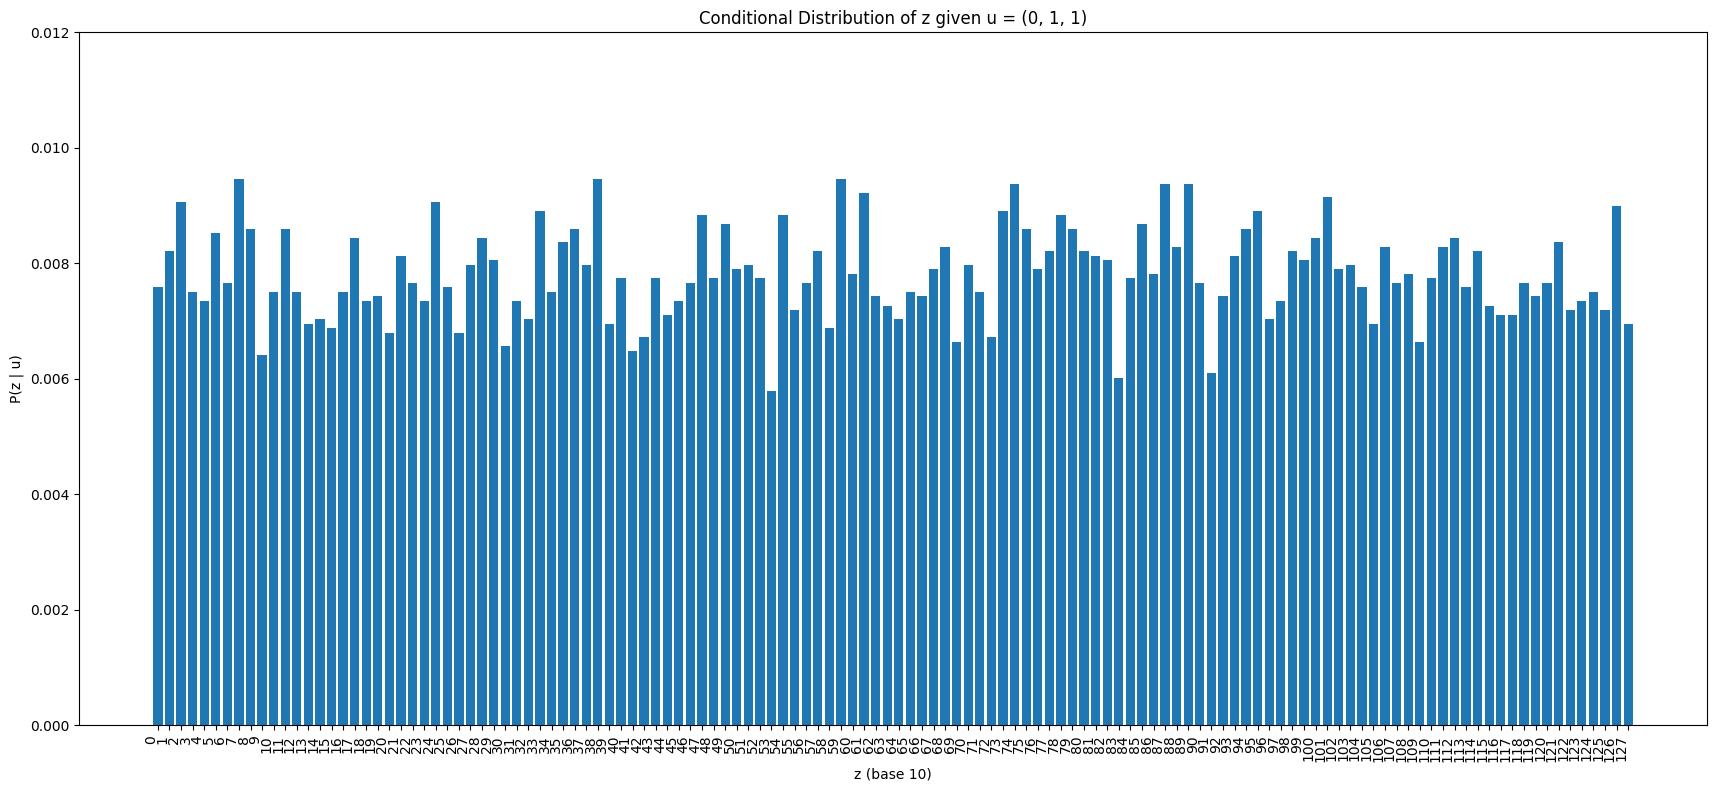

dist: {(0, 0, 0): {(0, 0, 0, 0, 0, 0, 0): 0.008203125, (0, 0, 0, 0, 0, 0, 1): 0.008515625, (0, 0, 0, 0, 0, 1, 0): 0.006796875, (0, 0, 0, 0, 0, 1, 1): 0.00765625, (0, 0, 0, 0, 1, 0, 0): 0.007265625, (0, 0, 0, 0, 1, 0, 1): 0.007890625, (0, 0, 0, 0, 1, 1, 0): 0.008203125, (0, 0, 0, 0, 1, 1, 1): 0.0075, (0, 0, 0, 1, 0, 0, 0): 0.00828125, (0, 0, 0, 1, 0, 0, 1): 0.007890625, (0, 0, 0, 1, 0, 1, 0): 0.00875, (0, 0, 0, 1, 0, 1, 1): 0.008046875, (0, 0, 0, 1, 1, 0, 0): 0.008125, (0, 0, 0, 1, 1, 0, 1): 0.00734375, (0, 0, 0, 1, 1, 1, 0): 0.0090625, (0, 0, 0, 1, 1, 1, 1): 0.007265625, (0, 0, 1, 0, 0, 0, 0): 0.008359375, (0, 0, 1, 0, 0, 0, 1): 0.00890625, (0, 0, 1, 0, 0, 1, 0): 0.007890625, (0, 0, 1, 0, 0, 1, 1): 0.0078125, (0, 0, 1, 0, 1, 0, 0): 0.00703125, (0, 0, 1, 0, 1, 0, 1): 0.009296875, (0, 0, 1, 0, 1, 1, 0): 0.007265625, (0, 0, 1, 0, 1, 1, 1): 0.00875, (0, 0, 1, 1, 0, 0, 0): 0.00859375, (0, 0, 1, 1, 0, 0, 1): 0.00921875, (0, 0, 1, 1, 0, 1, 0): 0.007734375, (0, 0, 1, 1, 0, 1, 1): 0.008671875, 

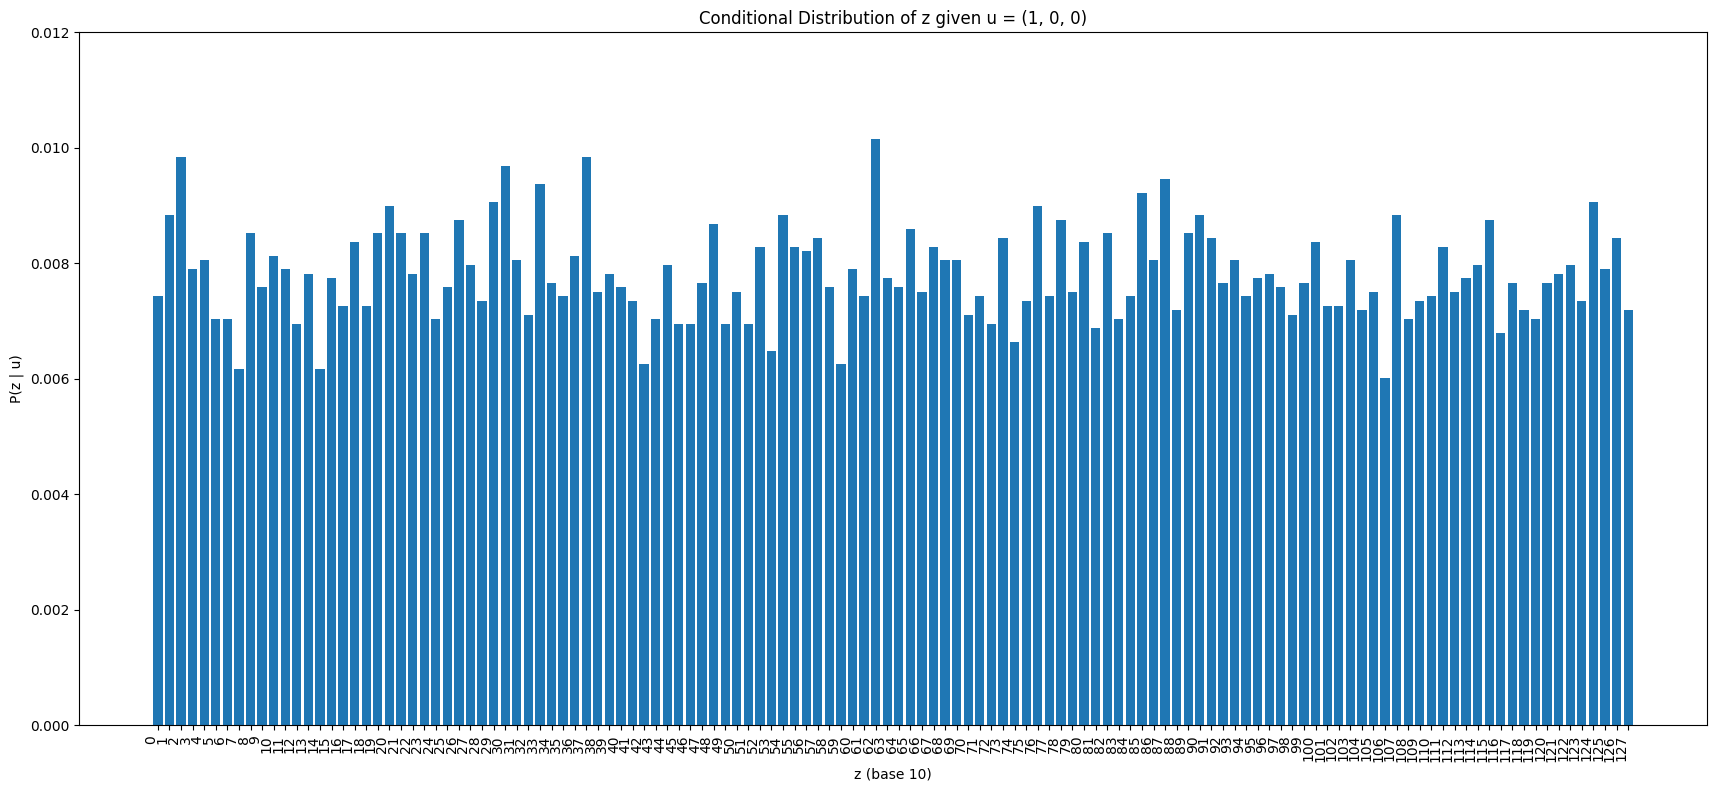

dist: {(0, 0, 0): {(0, 0, 0, 0, 0, 0, 0): 0.008203125, (0, 0, 0, 0, 0, 0, 1): 0.008515625, (0, 0, 0, 0, 0, 1, 0): 0.006796875, (0, 0, 0, 0, 0, 1, 1): 0.00765625, (0, 0, 0, 0, 1, 0, 0): 0.007265625, (0, 0, 0, 0, 1, 0, 1): 0.007890625, (0, 0, 0, 0, 1, 1, 0): 0.008203125, (0, 0, 0, 0, 1, 1, 1): 0.0075, (0, 0, 0, 1, 0, 0, 0): 0.00828125, (0, 0, 0, 1, 0, 0, 1): 0.007890625, (0, 0, 0, 1, 0, 1, 0): 0.00875, (0, 0, 0, 1, 0, 1, 1): 0.008046875, (0, 0, 0, 1, 1, 0, 0): 0.008125, (0, 0, 0, 1, 1, 0, 1): 0.00734375, (0, 0, 0, 1, 1, 1, 0): 0.0090625, (0, 0, 0, 1, 1, 1, 1): 0.007265625, (0, 0, 1, 0, 0, 0, 0): 0.008359375, (0, 0, 1, 0, 0, 0, 1): 0.00890625, (0, 0, 1, 0, 0, 1, 0): 0.007890625, (0, 0, 1, 0, 0, 1, 1): 0.0078125, (0, 0, 1, 0, 1, 0, 0): 0.00703125, (0, 0, 1, 0, 1, 0, 1): 0.009296875, (0, 0, 1, 0, 1, 1, 0): 0.007265625, (0, 0, 1, 0, 1, 1, 1): 0.00875, (0, 0, 1, 1, 0, 0, 0): 0.00859375, (0, 0, 1, 1, 0, 0, 1): 0.00921875, (0, 0, 1, 1, 0, 1, 0): 0.007734375, (0, 0, 1, 1, 0, 1, 1): 0.008671875, 

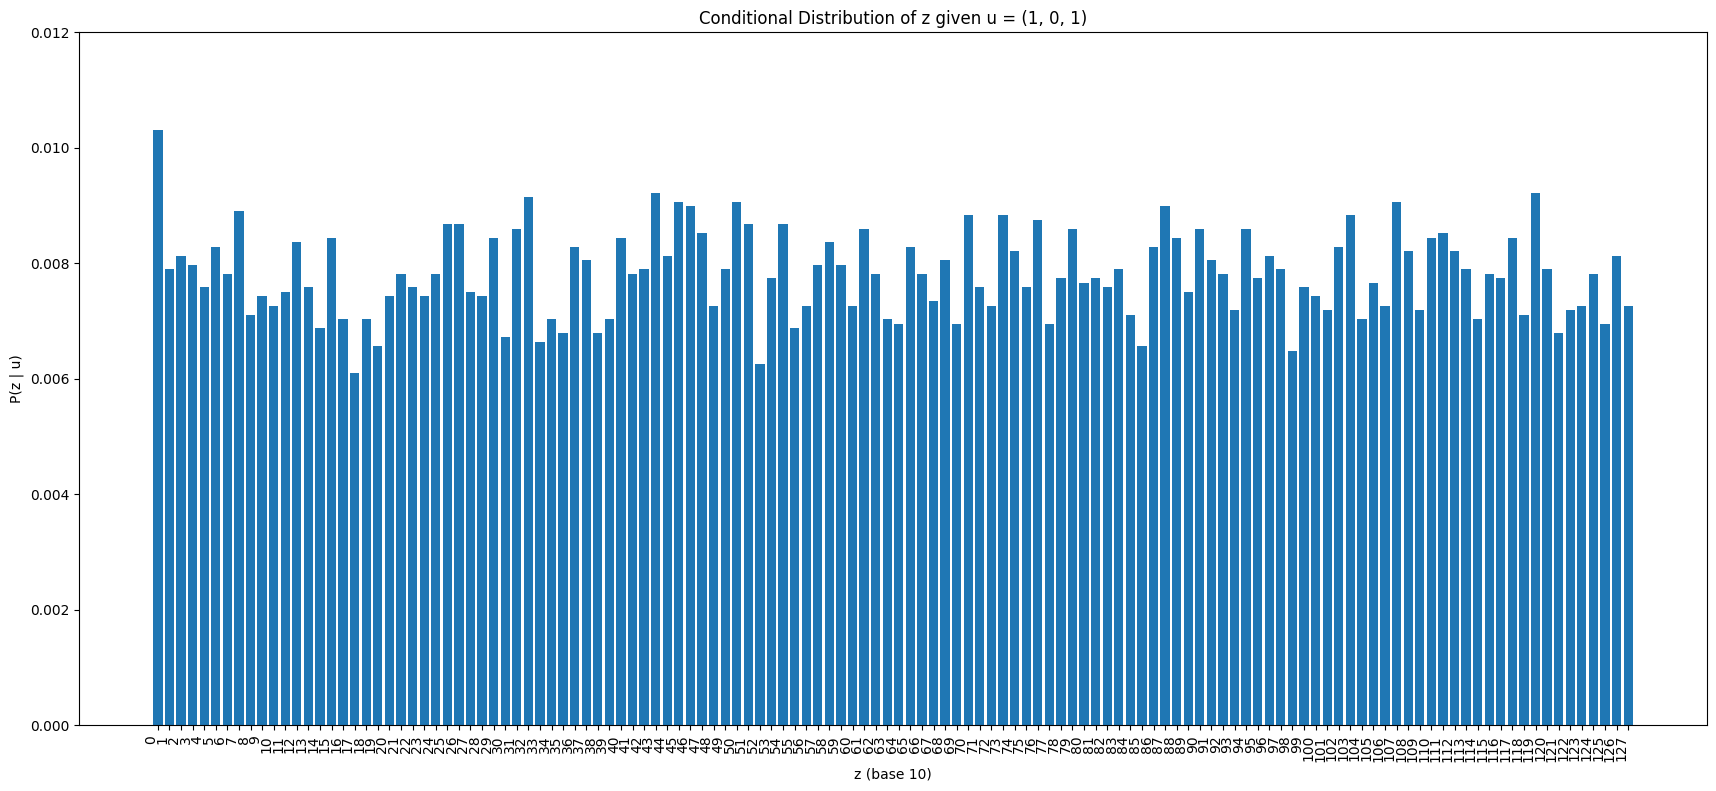

dist: {(0, 0, 0): {(0, 0, 0, 0, 0, 0, 0): 0.008203125, (0, 0, 0, 0, 0, 0, 1): 0.008515625, (0, 0, 0, 0, 0, 1, 0): 0.006796875, (0, 0, 0, 0, 0, 1, 1): 0.00765625, (0, 0, 0, 0, 1, 0, 0): 0.007265625, (0, 0, 0, 0, 1, 0, 1): 0.007890625, (0, 0, 0, 0, 1, 1, 0): 0.008203125, (0, 0, 0, 0, 1, 1, 1): 0.0075, (0, 0, 0, 1, 0, 0, 0): 0.00828125, (0, 0, 0, 1, 0, 0, 1): 0.007890625, (0, 0, 0, 1, 0, 1, 0): 0.00875, (0, 0, 0, 1, 0, 1, 1): 0.008046875, (0, 0, 0, 1, 1, 0, 0): 0.008125, (0, 0, 0, 1, 1, 0, 1): 0.00734375, (0, 0, 0, 1, 1, 1, 0): 0.0090625, (0, 0, 0, 1, 1, 1, 1): 0.007265625, (0, 0, 1, 0, 0, 0, 0): 0.008359375, (0, 0, 1, 0, 0, 0, 1): 0.00890625, (0, 0, 1, 0, 0, 1, 0): 0.007890625, (0, 0, 1, 0, 0, 1, 1): 0.0078125, (0, 0, 1, 0, 1, 0, 0): 0.00703125, (0, 0, 1, 0, 1, 0, 1): 0.009296875, (0, 0, 1, 0, 1, 1, 0): 0.007265625, (0, 0, 1, 0, 1, 1, 1): 0.00875, (0, 0, 1, 1, 0, 0, 0): 0.00859375, (0, 0, 1, 1, 0, 0, 1): 0.00921875, (0, 0, 1, 1, 0, 1, 0): 0.007734375, (0, 0, 1, 1, 0, 1, 1): 0.008671875, 

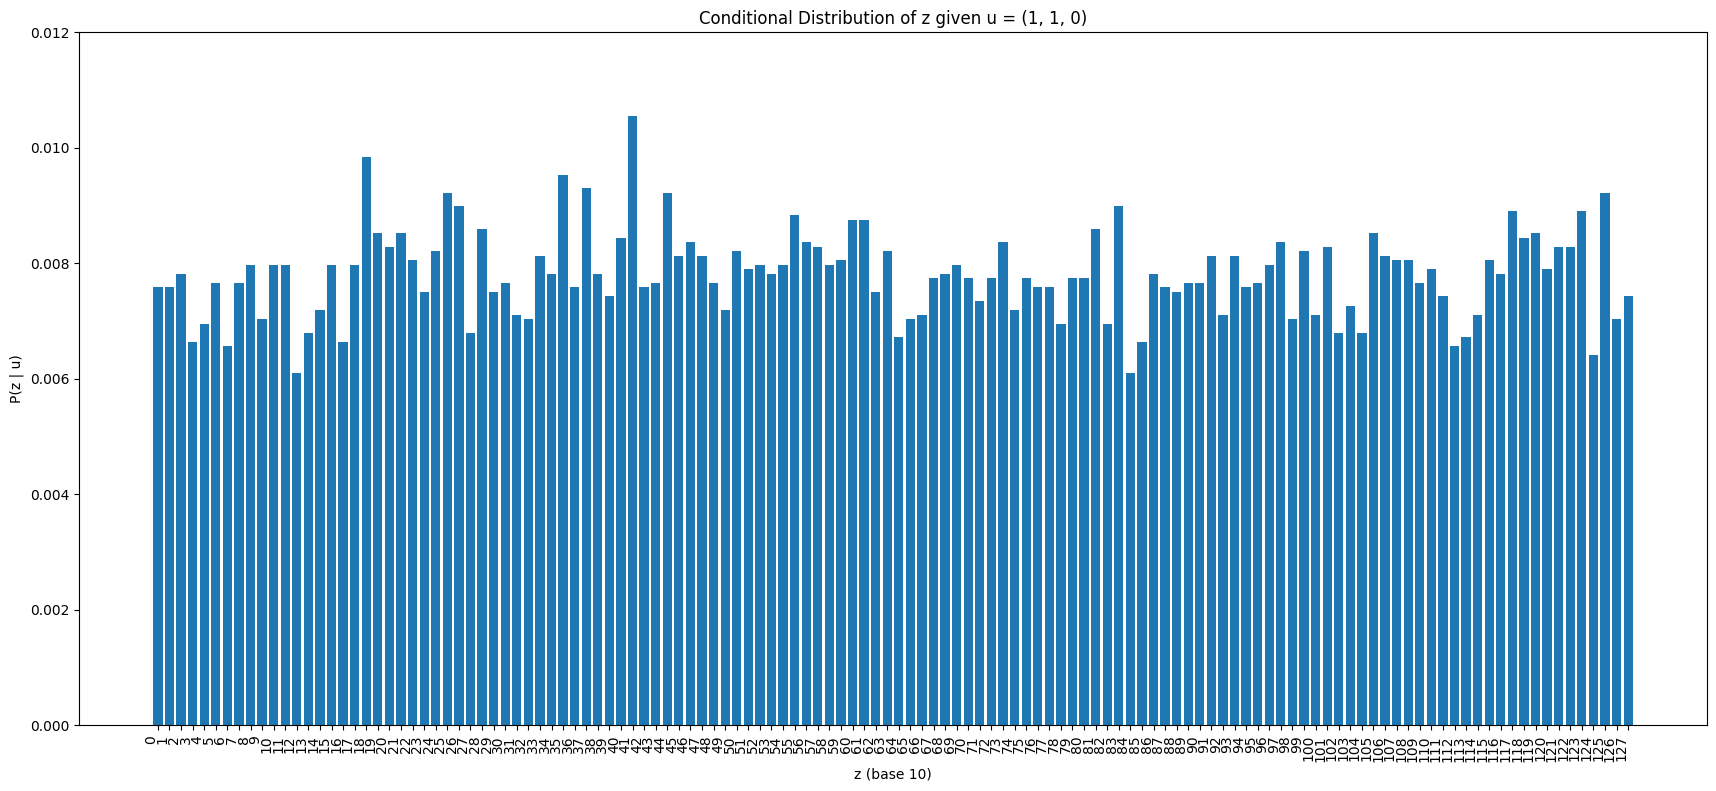

dist: {(0, 0, 0): {(0, 0, 0, 0, 0, 0, 0): 0.008203125, (0, 0, 0, 0, 0, 0, 1): 0.008515625, (0, 0, 0, 0, 0, 1, 0): 0.006796875, (0, 0, 0, 0, 0, 1, 1): 0.00765625, (0, 0, 0, 0, 1, 0, 0): 0.007265625, (0, 0, 0, 0, 1, 0, 1): 0.007890625, (0, 0, 0, 0, 1, 1, 0): 0.008203125, (0, 0, 0, 0, 1, 1, 1): 0.0075, (0, 0, 0, 1, 0, 0, 0): 0.00828125, (0, 0, 0, 1, 0, 0, 1): 0.007890625, (0, 0, 0, 1, 0, 1, 0): 0.00875, (0, 0, 0, 1, 0, 1, 1): 0.008046875, (0, 0, 0, 1, 1, 0, 0): 0.008125, (0, 0, 0, 1, 1, 0, 1): 0.00734375, (0, 0, 0, 1, 1, 1, 0): 0.0090625, (0, 0, 0, 1, 1, 1, 1): 0.007265625, (0, 0, 1, 0, 0, 0, 0): 0.008359375, (0, 0, 1, 0, 0, 0, 1): 0.00890625, (0, 0, 1, 0, 0, 1, 0): 0.007890625, (0, 0, 1, 0, 0, 1, 1): 0.0078125, (0, 0, 1, 0, 1, 0, 0): 0.00703125, (0, 0, 1, 0, 1, 0, 1): 0.009296875, (0, 0, 1, 0, 1, 1, 0): 0.007265625, (0, 0, 1, 0, 1, 1, 1): 0.00875, (0, 0, 1, 1, 0, 0, 0): 0.00859375, (0, 0, 1, 1, 0, 0, 1): 0.00921875, (0, 0, 1, 1, 0, 1, 0): 0.007734375, (0, 0, 1, 1, 0, 1, 1): 0.008671875, 

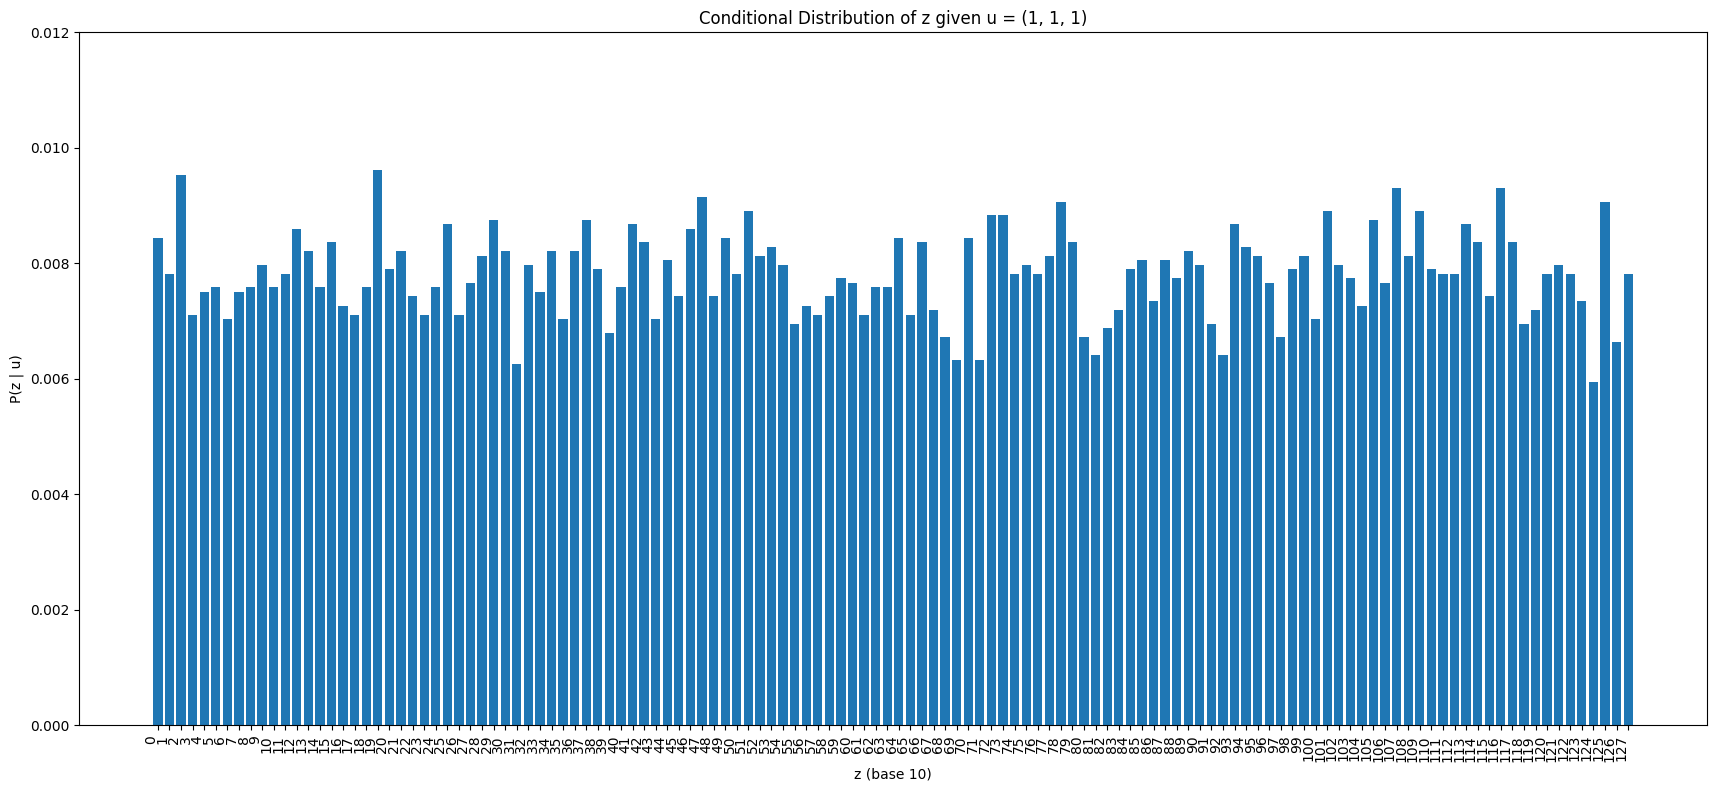

In [22]:
all_messages = [list(vector) for vector in itertools.product([0, 1], repeat=3)]
for u in all_messages:
    plot_conditional_distribution(dist, tuple(u))

In [23]:
joint_prob = {}
for u, cond_prob in dist.items():
    for z, prob in cond_prob.items():
        joint_prob[(u, z)] = prob * p_u

print("Probabilità congiunta P(u, z):")
for (u, z), joint in joint_prob.items():
    print(f"P(u = {u}, z = {z}) : {joint:.6f}")

Probabilità congiunta P(u, z):
P(u = (0, 0, 0), z = (0, 0, 0, 0, 0, 0, 0)) : 0.001025
P(u = (0, 0, 0), z = (0, 0, 0, 0, 0, 0, 1)) : 0.001064
P(u = (0, 0, 0), z = (0, 0, 0, 0, 0, 1, 0)) : 0.000850
P(u = (0, 0, 0), z = (0, 0, 0, 0, 0, 1, 1)) : 0.000957
P(u = (0, 0, 0), z = (0, 0, 0, 0, 1, 0, 0)) : 0.000908
P(u = (0, 0, 0), z = (0, 0, 0, 0, 1, 0, 1)) : 0.000986
P(u = (0, 0, 0), z = (0, 0, 0, 0, 1, 1, 0)) : 0.001025
P(u = (0, 0, 0), z = (0, 0, 0, 0, 1, 1, 1)) : 0.000937
P(u = (0, 0, 0), z = (0, 0, 0, 1, 0, 0, 0)) : 0.001035
P(u = (0, 0, 0), z = (0, 0, 0, 1, 0, 0, 1)) : 0.000986
P(u = (0, 0, 0), z = (0, 0, 0, 1, 0, 1, 0)) : 0.001094
P(u = (0, 0, 0), z = (0, 0, 0, 1, 0, 1, 1)) : 0.001006
P(u = (0, 0, 0), z = (0, 0, 0, 1, 1, 0, 0)) : 0.001016
P(u = (0, 0, 0), z = (0, 0, 0, 1, 1, 0, 1)) : 0.000918
P(u = (0, 0, 0), z = (0, 0, 0, 1, 1, 1, 0)) : 0.001133
P(u = (0, 0, 0), z = (0, 0, 0, 1, 1, 1, 1)) : 0.000908
P(u = (0, 0, 0), z = (0, 0, 1, 0, 0, 0, 0)) : 0.001045
P(u = (0, 0, 0), z = (0, 0, 1, 0, 

In [24]:
sum_prob = 0
for (u, z), prob in joint_prob.items():
    sum_prob += prob
print(f"Somma delle probabilità congiunte: {sum_prob:.6f}")

Somma delle probabilità congiunte: 1.000000


In [25]:
def mutual_information(joint_prob, z_dist, u_dist):
    I = 0
    for (u, z), joint in joint_prob.items():
        I += joint * np.log2(joint / (u_dist[u] * z_dist[z]))
    return I

In [26]:
all_messages = [list(vector) for vector in itertools.product([0, 1], repeat=3)]
u_dist = {}
for u in all_messages:
    u_dist[tuple(u)] = 1/8

I_uz = mutual_information(joint_prob, z_dist, u_dist)
print(f"Informazione mutua I(U;Z): {I_uz:.6f} bit")

Informazione mutua I(U;Z): 0.006030 bit


#TASK 5

In [27]:
def binary_symmetric_channel(input,error):
    output=[]
    for bit in input:
        if random.random()<=error:
                output.append(bit ^1)
        else:
                output.append(bit)

    return output

def evaluate_BSC(error=0.1,iterations=10**5):
    x = [0,0,0,0,0,0,0]
    #error = 0.1
    count = 0

    for i in range(iterations):
        x_bsc = binary_symmetric_channel(x,error)
        for i in range(len(x)):
            if x_bsc[i]==1:
                count+=1

    return count/(iterations*len(x))

#Testing task 5

In [28]:
epsilon = 0.1
delta = 0.3
print("Legitimate channel:")
print((f"Mean error for {10**6} iterations is: {evaluate_BSC(epsilon, iterations=10**6)}."))
print("Eavesdropper: ")
print((f"Mean error for {10**6} iterations is: {evaluate_BSC(delta,iterations=10**6)}."))

Legitimate channel:
Mean error for 1000000 iterations is: 0.09989257142857143.
Eavesdropper: 
Mean error for 1000000 iterations is: 0.29992271428571426.


In [29]:
def wiretap_channel(u, channel = binary_symmetric_channel, legit_error = 0.1, eaves_error = 0.3,):
    x = random_binning_encoder(u)
    y = channel(x, legit_error)
    z = channel(x, eaves_error)
    return random_binning_decoder(y), random_binning_decoder(z)

def legitimate_bsc_simulation(error, iterations=10**5):
    all_messages = [list(v) for v in itertools.product([0, 1], repeat=3)]
    errors = 0
    for u in all_messages:
        for _ in range(iterations):
            y, _ = wiretap_channel(u, channel=binary_symmetric_channel, legit_error=error)
            if u != y:
                errors += 1
    # return average message error probability
    total_msgs = iterations * len(all_messages)
    return errors / total_msgs


In [30]:
print(legitimate_bsc_simulation(epsilon))

0.14974


##TASK 6 

In [ ]:
def plot_decoding_probability():
    #print("Tipo di z_probabilities:", type(z_probabilities))
    #print("Esempio contenuto:", list(z_probabilities.items())[:5])
    
    probabilities = []
    error_range = [val for val in np.arange(0, 1.01, 0.05)]
    for val in np.arange(0, 1.01, 0.05):
        probabilities.append(evaluate_BSC(error=val))
    
    #print(error_range)
    print(probabilities)
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(error_range, probabilities, color='skyblue', marker='o')
    for i, val in enumerate(probabilities):
        plt.text(error_range[i], val + 0.01, f"{val:.2f}", ha='center', fontsize=8)
    plt.xlabel("Channel error (BSC)")
    plt.ylabel("PMD")
    plt.title(f'PMD di $Z$ in function of {x}')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


[0.0, 0.049165714285714285, 0.09949428571428572, 0.1507842857142857, 0.19961571428571429, 0.2500428571428571, 0.30054142857142857, 0.3503657142857143, 0.39917142857142857, 0.45007, 0.5007728571428571, 0.5493228571428571, 0.5995328571428571, 0.6503214285714286, 0.69926, 0.7502271428571429, 0.8006957142857143, 0.8494442857142858, 0.8999442857142858, 0.9503142857142857, 1.0]


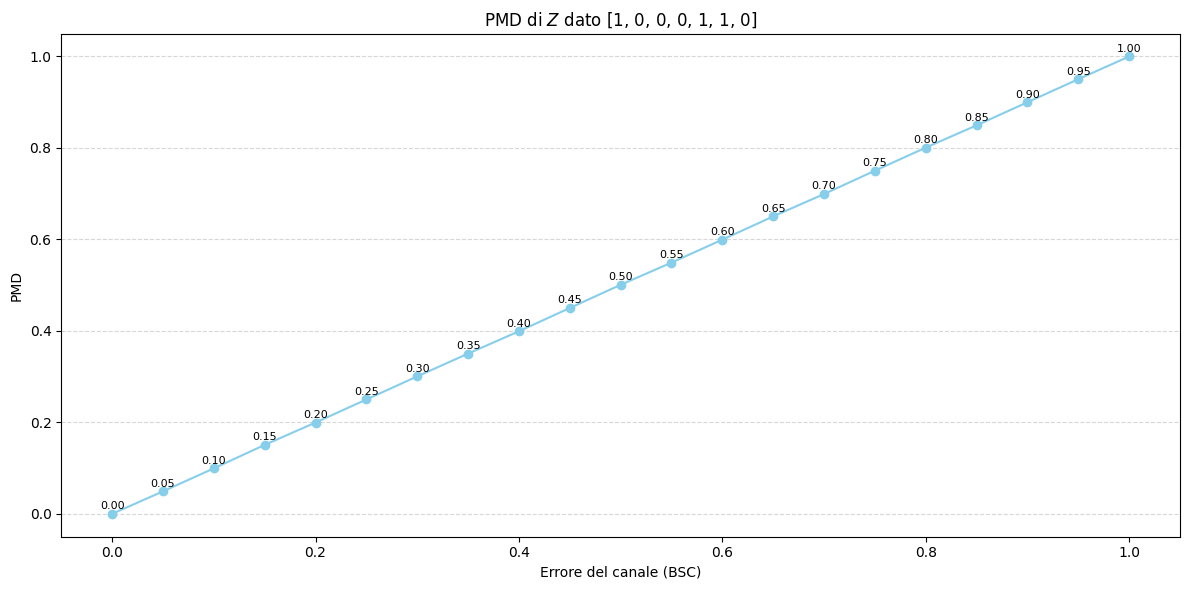

In [32]:
plot_decoding_probability()

In [34]:
import pandas as pd 

def evaluate_tasks_3_to_5(epsilon_delta_pairs, iterations=10**4):
    results = []
    all_messages = list(itertools.product([0, 1], repeat=3))
    for eps, delta in epsilon_delta_pairs:
        # 2. Reliability (message error probability at Bob)
        reliability = legitimate_bsc_simulation(eps, iterations)
        
        # 3. Secrecy: mutual information I(U; Z)
        joint_counts = Counter()
        marginal_u = Counter()
        marginal_z = Counter()
        for _ in range(iterations):
            u = random.choice(all_messages)
            _, z = wiretap_channel(list(u), channel=binary_symmetric_channel,
                                   legit_error=eps, eaves_error=delta)
            joint_counts[(tuple(u), tuple(z))] += 1
            marginal_u[tuple(u)] += 1
            marginal_z[tuple(z)] += 1
        # probabilities
        p_joint = {k: v/iterations for k, v in joint_counts.items()}
        p_u = {u: c/iterations for u, c in marginal_u.items()}
        p_z = {z: c/iterations for z, c in marginal_z.items()}
        # mutual information
        mi = sum(p_uz * np.log2(p_uz / (p_u[u] * p_z[z]))
                 for (u, z), p_uz in p_joint.items() if p_uz > 0)
        
        # 4. Total variation distance between p(u,z) and p(u)p(z)
        tvd = 0.5 * sum(abs(p_uz - p_u[u] * p_z[z])
                        for (u, z), p_uz in p_joint.items())
        
        # 5. Upper bound combining reliability and secrecy
        upper_bound = reliability + delta
        
        results.append({
            'ε (Bob error)': eps,
            'δ (Eve error)': delta,
            'Reliability P[u≠û]': reliability,
            'I(U;Z) [bits]': mi,
            'Total Variation Distance': tvd,
            'Upper Bound ε+δ': upper_bound
        })
    
    return pd.DataFrame(results)

# Choose several (ε, δ) pairs
epsilon_delta_pairs = [(0.01, 0.01), (0.05, 0.05), (0.1, 0.1), (0.2, 0.2), (0.3, 0.3)]

# Evaluate
df_results = evaluate_tasks_3_to_5(epsilon_delta_pairs, iterations=5000)


def evaluate_tasks_3_to_5(epsilon_delta_pairs, iterations=10**4):
    results = []
    all_messages = list(itertools.product([0, 1], repeat=3))
    for eps, delta in epsilon_delta_pairs:
        # 2. Reliability (message error probability at Bob)
        reliability = legitimate_bsc_simulation(eps, iterations)
        
        # 3. Secrecy: mutual information I(U; Z)
        joint_counts = Counter()
        marginal_u = Counter()
        marginal_z = Counter()
        for _ in range(iterations):
            u = random.choice(all_messages)
            _, z = wiretap_channel(list(u), channel=binary_symmetric_channel,
                                   legit_error=eps, eaves_error=delta)
            joint_counts[(tuple(u), tuple(z))] += 1
            marginal_u[tuple(u)] += 1
            marginal_z[tuple(z)] += 1
        # probabilities
        p_joint = {k: v/iterations for k, v in joint_counts.items()}
        p_u = {u: c/iterations for u, c in marginal_u.items()}
        p_z = {z: c/iterations for z, c in marginal_z.items()}
        # mutual information
        mi = sum(p_uz * np.log2(p_uz / (p_u[u] * p_z[z]))
                 for (u, z), p_uz in p_joint.items() if p_uz > 0)
        
        # 4. Total variation distance between p(u,z) and p(u)p(z)
        tvd = 0.5 * sum(abs(p_uz - p_u[u] * p_z[z])
                        for (u, z), p_uz in p_joint.items())
        
        # 5. Upper bound combining reliability and secrecy
        upper_bound = reliability + delta
        
        results.append({
            'ε (Bob error)': eps,
            'δ (Eve error)': delta,
            'Reliability P[u≠û]': reliability,
            'I(U;Z) [bits]': mi,
            'Total Variation Distance': tvd,
            'Upper Bound ε+δ': upper_bound
        })
    
    return pd.DataFrame(results)

# Choose several (ε, δ) pairs
epsilon_delta_pairs = [(0.01, 0.01), (0.05, 0.05), (0.1, 0.1), (0.2, 0.2), (0.3, 0.3)]

# Evaluate
df_results = evaluate_tasks_3_to_5(epsilon_delta_pairs, iterations=5000)

print(df_results)

   ε (Bob error)  δ (Eve error)  Reliability P[u≠û]  I(U;Z) [bits]  \
0           0.01           0.01            0.002050       2.985249   
1           0.05           0.05            0.044875       2.655939   
2           0.10           0.10            0.148900       1.971763   
3           0.20           0.20            0.426875       0.834958   
4           0.30           0.30            0.665350       0.231572   

   Total Variation Distance  Upper Bound ε+δ  
0                  0.481476         0.012050  
1                  0.796839         0.094875  
2                  0.723835         0.248900  
3                  0.451794         0.626875  
4                  0.216424         0.965350  


In [35]:
def plot_mutual_information(delta_range, iterations=10**4):
    mutual_informations = []
    for delta in delta_range:
        joint_counts = Counter()
        marginal_u = Counter()
        marginal_z = Counter()
        
        for _ in range(iterations):
            u = random.choice(all_messages)
            _, z = wiretap_channel(list(u), channel=binary_symmetric_channel,
                                   legit_error=0.0, eaves_error=delta)
            joint_counts[(tuple(u), tuple(z))] += 1
            marginal_u[tuple(u)] += 1
            marginal_z[tuple(z)] += 1
        
        # probabilities
        p_joint = {k: v/iterations for k, v in joint_counts.items()}
        p_u = {u: c/iterations for u, c in marginal_u.items()}
        p_z = {z: c/iterations for z, c in marginal_z.items()}
        
        # mutual information
        mi = sum(p_uz * np.log2(p_uz / (p_u[u] * p_z[z]))
                 for (u, z), p_uz in p_joint.items() if p_uz > 0)
        mutual_informations.append(mi)
    
    plt.figure(figsize=(8, 6))
    plt.plot(delta_range, mutual_informations, marker='o', linestyle='-', color='green')
    plt.title('Mutual Information I(u; z) vs δ (Eve error)')
    plt.xlabel('δ (Eve error)')
    plt.ylabel('Mutual Information I(u; z) [bits]')
    plt.grid(True)
    plt.show()


In [ ]:
def plot_security_level_contour(epsilon_delta_pairs, iterations=10**4):
    security_levels = np.zeros((len(epsilon_delta_pairs), len(epsilon_delta_pairs)))

    for i, (eps, delta) in enumerate(epsilon_delta_pairs):
        # Compute reliability and secrecy for the (eps, delta) pair
        reliability = legitimate_bsc_simulation(eps, iterations)
        joint_counts = Counter()
        marginal_u = Counter()
        marginal_z = Counter()
        
        for _ in range(iterations):
            u = random.choice(all_messages)
            _, z = wiretap_channel(list(u), channel=binary_symmetric_channel,
                                   legit_error=eps, eaves_error=delta)
            joint_counts[(tuple(u), tuple(z))] += 1
            marginal_u[tuple(u)] += 1
            marginal_z[tuple(z)] += 1
        
        # probabilities
        p_joint = {k: v/iterations for k, v in joint_counts.items()}
        p_u = {u: c/iterations for u, c in marginal_u.items()}
        p_z = {z: c/iterations for z, c in marginal_z.items()}
        
        # mutual information
        mi = sum(p_uz * np.log2(p_uz / (p_u[u] * p_z[z]))
                 for (u, z), p_uz in p_joint.items() if p_uz > 0)
        
        # Security level is calculated as the total variation distance
        tvd = 0.5 * sum(abs(p_uz - p_u[u] * p_z[z])
                        for (u, z), p_uz in p_joint.items())
        
        # Calculate security level (distance from ideal)
        security_level = tvd + reliability + mi
        security_levels[i, i] = security_level

    # Contour plot of security levels
    plt.figure(figsize=(10, 6))
    cp = plt.contourf(security_levels, levels=20, cmap='viridis')
    plt.colorbar(cp)
    plt.title('Contour plot of Security Level d(M, M⋆) vs ε and δ')
    plt.xlabel('ε (Bob error)')
    plt.ylabel('δ (Eve error)')
    plt.grid(True)
    plt.show()


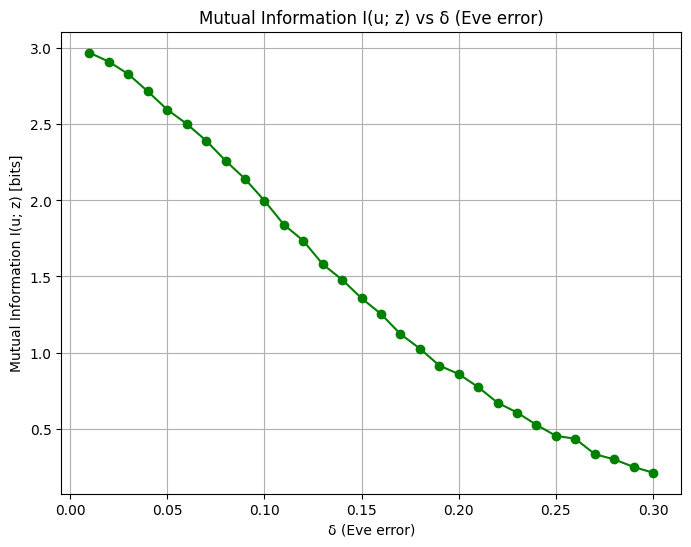

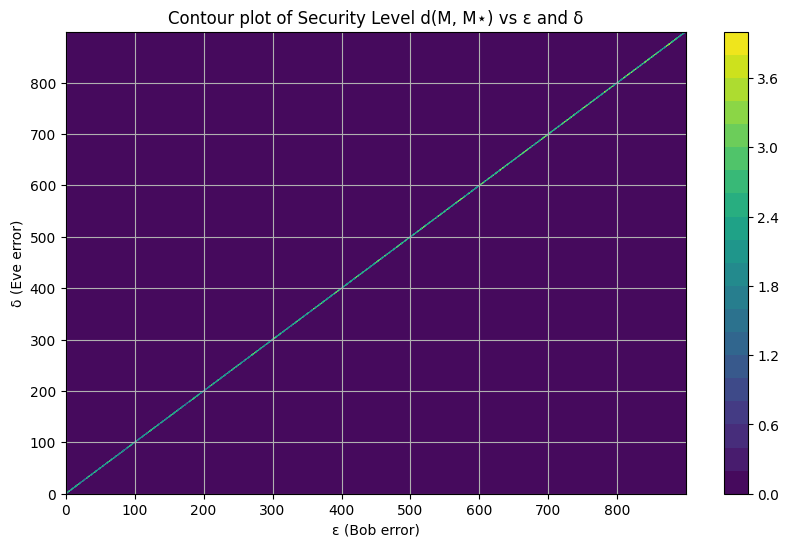

In [42]:
# Parameters
epsilon_range = np.linspace(0.01, 0.3, 30)
delta_range = np.linspace(0.01, 0.3, 30)
epsilon_delta_pairs = [(eps, delta) for eps in epsilon_range for delta in delta_range]


# Task 5: Plot dell'informazione reciproca I(u; z)
plot_mutual_information(delta_range)

# Task 6: Contour plot del livello di sicurezza
plot_security_level_contour(epsilon_delta_pairs)

##TASK 7

In [43]:
#BPSK == 2 levels PAM

def bpsk_modulation(input):
    return [1 if bit == 1 else -1 for bit in input]


def bpsk_demodulation(input):
    return [1 if signal > 0 else 0 for signal in input]


def awgn_channel(input, snr_db):
    # Modula il segnale usando BPSK
    modulated_signal = bpsk_modulation(input)
    
    # Calcola la potenza del segnale (g^2)
    signal_power = np.mean(np.array(modulated_signal) ** 2)
    
    # Converti l'SNR da decibel a valore lineare
    snr_linear = 10 ** (snr_db / 10)
    
    # Calcola la potenza del rumore (sigma^2)
    noise_power = signal_power / snr_linear
    
    # Genera il rumore AWGN
    noise = np.random.normal(0, np.sqrt(noise_power), len(input))
    
    # Aggiungi il rumore al segnale modulato
    modulated_noisy_signal = [modulated_signal[i] + noise[i] for i in range(len(input))]
    
    # Demodula il segnale rumoroso
    noisy_signal = bpsk_demodulation(modulated_noisy_signal)
    
    return noisy_signal



#TASK 8

In [44]:
def simulate_system(snr_db_bob, snr_db_eve, iterations=10**4):
    all_messages = [list(vector) for vector in itertools.product([0, 1], repeat=3)]
    bit_errors_bob = 0
    bit_errors_eve = 0
    mutual_info_total = 0
    counts_joint_eve = Counter()
    counts_u = Counter()

    for _ in range(iterations):
        u = random.choice(all_messages)

        # Bob's side
        bob_received, _ = wiretap_channel(u, 
                                          channel=lambda x, _: awgn_channel(x, snr_db_bob),
                                          legit_error=0.0,
                                          eaves_error=0.0)
        bit_errors_bob += sum([bit_u != bit_bob for bit_u, bit_bob in zip(u, bob_received)])

        # Eve's side
        _, eve_received = wiretap_channel(u, 
                                          channel=lambda x, _: awgn_channel(x, snr_db_eve),
                                          legit_error=0.0,
                                          eaves_error=0.0)
        bit_errors_eve += sum([bit_u != bit_eve for bit_u, bit_eve in zip(u, eve_received)])

        # Save statistics for mutual information
        counts_joint_eve[(tuple(u), tuple(eve_received))] += 1
        counts_u[tuple(u)] += 1

        # Estimate mutual information I(u; z) (empirical)
    prob_joint = {k: v / iterations for k, v in counts_joint_eve.items()}
    prob_u = {k: v / iterations for k, v in counts_u.items()}
    prob_z = Counter()
    for (u, z), p in prob_joint.items():
        prob_z[z] += p

    mutual_info = 0
    for (u, z), p_uz in prob_joint.items():
        if p_uz > 0:
            mutual_info += p_uz * np.log2(p_uz / (prob_u[u] * prob_z[z]))
   
    # Compute Total Variation Distance
    ideal_prob = 1 / (2 ** (len(u) * 2)) # assuming perfect uniformity over (u,z) pairs
    total_variation = 0.5 * sum([abs(p_uz - ideal_prob) for p_uz in prob_joint.values()])

    ber_bob = bit_errors_bob / (iterations * len(u))
    ber_eve = bit_errors_eve / (iterations * len(u))
    avg_mutual_info = mutual_info / iterations

    # Approximate secrecy capacity (this is a rough version)
    secrecy_capacity = max(0, 1 - ber_bob - ber_eve)

    return ber_bob, ber_eve, avg_mutual_info, total_variation, secrecy_capacity

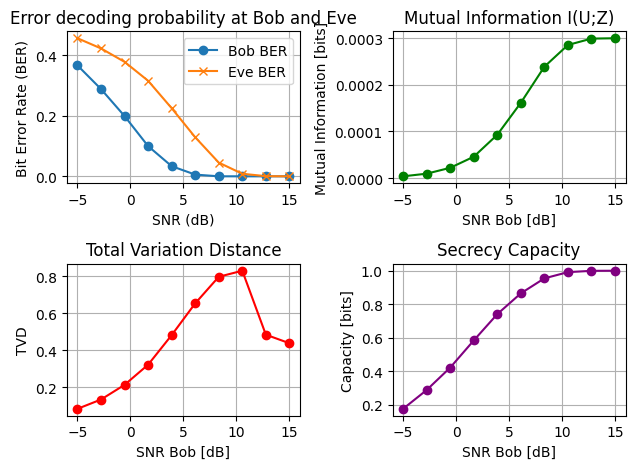

In [45]:

mutual_info_list = []
total_variation_list = []
secrecy_capacity_list = []

# SNR range
snr_range = np.linspace(-5, 15, 10)

ber_bob_list = []
ber_eve_list = []
secrecy_capacity_list = []

for snr in snr_range:
    ber_bob, ber_eve, mutual_info,total_variation, secrecy_cap = simulate_system(snr_db_bob=snr, snr_db_eve=snr-5)
    ber_bob_list.append(ber_bob)
    ber_eve_list.append(ber_eve)
    mutual_info_list.append(mutual_info)
    total_variation_list.append(total_variation)
    secrecy_capacity_list.append(secrecy_cap)

# Plot P[û ≠ u] for Bob and Eve
plt.subplot(2,2,1)
plt.plot(snr_range, ber_bob_list, marker='o', label="Bob BER")
plt.plot(snr_range, ber_eve_list, marker='x', label="Eve BER")
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.title('Error decoding probability at Bob and Eve')
plt.legend()
plt.grid(True)


plt.subplot(2,2,2)
plt.plot(snr_range, mutual_info_list, marker='o', color='green')
plt.title('Mutual Information I(U;Z)')
plt.xlabel('SNR Bob [dB]')
plt.ylabel('Mutual Information [bits]')
plt.grid()

plt.subplot(2,2,3)
plt.plot(snr_range, total_variation_list, marker='o', color='red')
plt.title('Total Variation Distance')
plt.xlabel('SNR Bob [dB]')
plt.ylabel('TVD')
plt.grid()

plt.subplot(2,2,4)
plt.plot(snr_range, secrecy_capacity_list, marker='o', color='purple')
plt.title('Secrecy Capacity')
plt.xlabel('SNR Bob [dB]')
plt.ylabel('Capacity [bits]')
plt.grid()

plt.tight_layout()
plt.show()


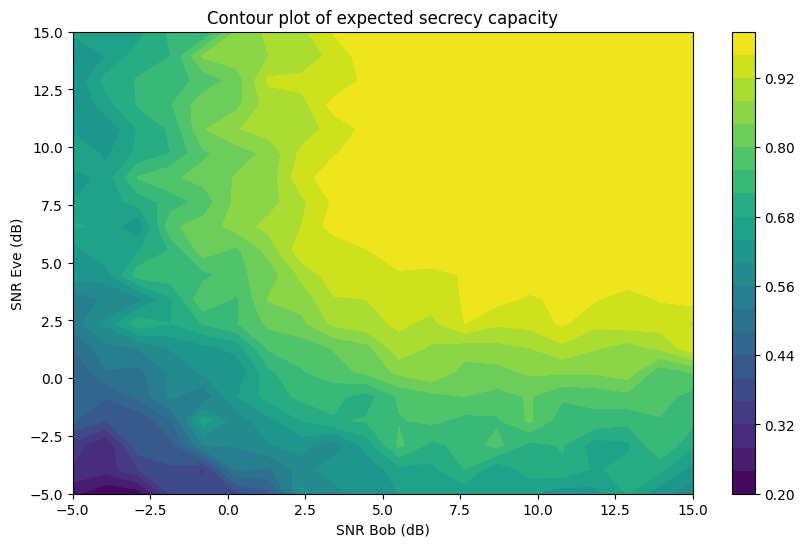

In [46]:
# Contour plot of expected secrecy capacity
SNR_BOB, SNR_EVE = np.meshgrid(np.linspace(-5, 15, 20), np.linspace(-5, 15, 20))
Secrecy = np.zeros_like(SNR_BOB)

for i in range(SNR_BOB.shape[0]):
    for j in range(SNR_BOB.shape[1]):
        ber_bob, ber_eve,avg_mutual_info,total_variation_list, secrecy_cap = simulate_system(snr_db_bob=SNR_BOB[i,j], snr_db_eve=SNR_EVE[i,j],iterations=10**2)
        Secrecy[i,j] = secrecy_cap

plt.figure(figsize=(10,6))
cp = plt.contourf(SNR_BOB, SNR_EVE, Secrecy, levels=20, cmap='viridis')
plt.colorbar(cp)
plt.xlabel('SNR Bob (dB)')
plt.ylabel('SNR Eve (dB)')
plt.title('Contour plot of expected secrecy capacity')
plt.show()